In [1]:
import os
import sys
script_path = "./Libs/"
sys.path.append(os.path.abspath(script_path))
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pylab
import librosa.display
import scipy.io.wavfile as wavio
from mel_utils import get_mel_spectrum, get_filterbanks, powspec, get_filterbank_from_midfreqs, framesig, genICFilterMatrix
from scipy import signal # audio processing
from scipy.fftpack import dct
import librosa # library for audio
import skimage

In [2]:
# !pip install scikit-image

## This Code is to demostrate how to vistualizing speech data for analyzing speech

In [3]:
# !pip install scikit-image

In [4]:
"""
very basic spectrogram drawing
# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('y.wav')

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file with piano music')

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

plot.show()
"""

"\nvery basic spectrogram drawing\n# Read the wav file (mono)\n\nsamplingFrequency, signalData = wavfile.read('y.wav')\n\n# Plot the signal read from wav file\n\nplot.subplot(211)\n\nplot.title('Spectrogram of a wav file with piano music')\n\nplot.plot(signalData)\n\nplot.xlabel('Sample')\n\nplot.ylabel('Amplitude')\n\nplot.subplot(212)\n\nplot.specgram(signalData,Fs=samplingFrequency)\n\nplot.xlabel('Time')\n\nplot.ylabel('Frequency')\n\nplot.show()\n"

In [5]:
def log_specgram(audio, sample_rate, window_size=10, 
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    _, _, spec = signal.spectrogram(audio, fs=sample_rate,
                                    window='hann', nperseg=nperseg, noverlap=noverlap,
                                    detrend=False)
    return np.log(spec.T.astype(np.float32) + eps)

def audio_to_data(path):
    # we take a single path and convert it into data
    sample_rate, audio = wavfile.read(path)
    spectrogram = log_specgram(audio, sample_rate, 10, 0)
    return spectrogram.T

In [5]:
"""
sig, fs = librosa.load('path_to_my_wav_file')   
# make pictures name 
save_path = 'test.jpg'

pylab.axis('off') # no axis
pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
S = librosa.feature.melspectrogram(y=sig, sr=fs)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
pylab.close()
"""

"\nsig, fs = librosa.load('path_to_my_wav_file')   \n# make pictures name \nsave_path = 'test.jpg'\n\npylab.axis('off') # no axis\npylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge\nS = librosa.feature.melspectrogram(y=sig, sr=fs)\nlibrosa.display.specshow(librosa.power_to_db(S, ref=np.max))\npylab.savefig(save_path, bbox_inches=None, pad_inches=0)\npylab.close()\n"

In [22]:
test_wav_file = "./compared_wav/Speech_CL.mp3.wav"

In [23]:
def run_librosa_draw_melspectrogram(wavfile):
    sig, fs = librosa.load(wavfile)   
    # make pictures name 
    save_path = './test.jpg'
#     pylab.axis('off') # no axis
    pylab.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[]) # Remove the white edge
    S = getMelSpectrogram(sig,fs)
    print(S.shape)
#     plt.show(S)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max),y_axis='mel', fmax=9500, x_axis='time')
#     pylab.savefig(save_path, bbox_inches=None, pad_inches=0)
#     pylab.close()

In [24]:
def getMelSpectrogram(signal, samplerate):
    S_ = librosa.feature.melspectrogram(y=signal, sr=samplerate, n_fft=1024, win_length=400, hop_length=400)
    return S_

(128, 1885)


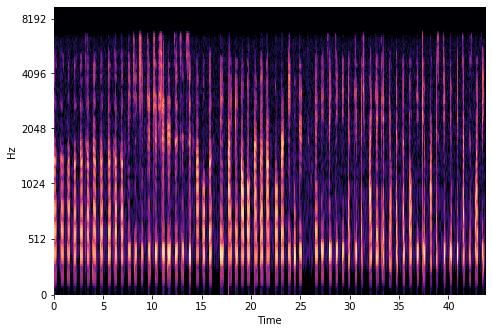

In [25]:
run_librosa_draw_melspectrogram(test_wav_file)

In [26]:
def run_draw_icfilter_spectrogram(wavfile):
    middleFreq = [16, 20, 26, 36, 48, 60, 80, 101, 256, 353]
    inband = 4
    bandnum_ = 10
    y_length_=513
    ic_fb = genICFilterMatrix(bandnum=10,y_length=513,mid_freq_matrix=middleFreq)
    sr, sig = wavio.read(wavfile)
    framed_sig = framesig(sig,400,400)
    sig_powspec = powspec(framed_sig,1024)
    sample_len = 513
    sig_powspec = np.split(sig_powspec.T,[0,sample_len],axis=0)[1]
    print(ic_fb.shape)
    print(sig_powspec.shape)
    sig_specgram = np.dot(sig_powspec.T,ic_fb.T)
    librosa.display.specshow(librosa.power_to_db(sig_powspec, ref=np.max),y_axis='mel', fmax=10000, x_axis='time')

/Users/xrickliao/RLRepository/Rick_Code_Repo/VAD/rick_vad/MainSrc/Drawing/mel_utils.py:375: RuntimeWarning: invalid value encountered in log10
  ret_icfilter[i][j]=10**((-20*12*abs(np.log10(15.625*(j-1)+1)-np.log10(15.625*(mid_freq_matrix[i]-1))))/20)
/Users/xrickliao/RLRepository/Rick_Code_Repo/VAD/rick_vad/MainSrc/Drawing/mel_utils.py:369: RuntimeWarning: invalid value encountered in log10
  ret_icfilter[i][j]=10**((-360*abs(np.log10(15.625*(j-1)+1)-np.log10(15.625*(mid_freq_matrix[i]-1))))/20)


(10, 513)
(513, 1368)


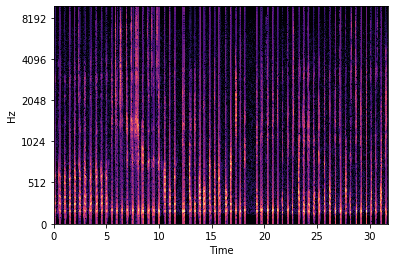

In [27]:
run_draw_icfilter_spectrogram(test_wav_file)

In [28]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

In [29]:
def normalized_fb(fb):
    fb -= (np.mean(fb, axis=0) + 1e-8)
    return fb

In [14]:
def run_drawing_before_melspectrogram(wavfile):
    sr, sig = wavio.read(wavfile)
    plt.figure(figsize=(14,10))
    plt.subplot(211)
    plt.title('wavform and spectrogram of wav file')
    plt.plot(sig)
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.specgram(sig,Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

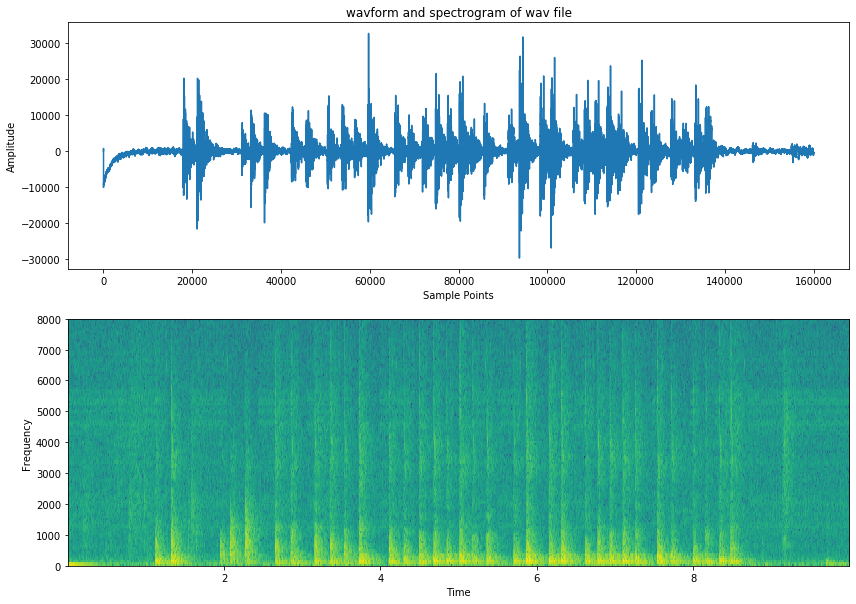

In [15]:
run_drawing_before_melspectrogram(test_wav_file)

In [16]:
def run_draw_melspecg_in_10_band(wavfile):
    sr, sig = wavio.read(wavfile)
    framed_sig = framesig(sig,400,400)
    print("length of framed_sig is {}".format(len(framed_sig)))
    sample_len = 513
    mid_banks = [0.0,195.0985245,251.8401972,312.1788118,376.342384,
                 444.5733837,517.1296516,1550.447293,2554.078667,
                 3461.030019,4620.759758,8000.0]
    melfb = get_filterbank_from_midfreqs(midFreqs=mid_banks)
#     melfb = get_filterbanks()
    sig_powspec = powspec(framed_sig,1024)
    sig_powspec = np.split(sig_powspec.T,[0,sample_len],axis=0)[1]
    print(melfb.shape)
    print(sig_powspec.shape)
    sig_specgram = np.dot(sig_powspec.T,melfb.T)
    sig_specgram = normalized_fb(sig_specgram)
    print(sig_specgram)
    librosa.display.specshow(librosa.power_to_db(sig_powspec, ref=np.max),y_axis='mel', fmax=10000, x_axis='time')
#     log_specgram = 10*np.log(sig_specgram+1e-9)

length of framed_sig is 400
[   0.         195.0985245  251.8401972  312.1788118  376.342384
  444.5733837  517.1296516 1550.447293  2554.078667  3461.030019
 4620.759758  8000.       ]
12
(10, 513)
(513, 400)
[[ 1.79070874e+08 -1.25158581e+08 -7.78208378e+07 ...  5.70789327e+06
   2.55022972e+06  3.64700141e+06]
 [-2.41961470e+08 -1.44485184e+08 -9.06261552e+07 ...  3.28839117e+06
   1.19855729e+05  1.57736795e+06]
 [-4.45696375e+08 -1.54475352e+08 -1.00829637e+08 ...  3.62114348e+05
  -7.89835575e+05  4.14967793e+05]
 ...
 [-9.17465014e+08 -1.75795282e+08 -1.16980443e+08 ... -3.56142259e+06
  -3.47018878e+06 -2.89411926e+06]
 [-9.23438822e+08 -1.75340376e+08 -1.16903219e+08 ... -3.37668993e+06
  -3.47567572e+06 -2.94930399e+06]
 [-9.20366186e+08 -1.75680302e+08 -1.16937978e+08 ... -3.42113681e+06
  -3.41729398e+06 -3.02397981e+06]]


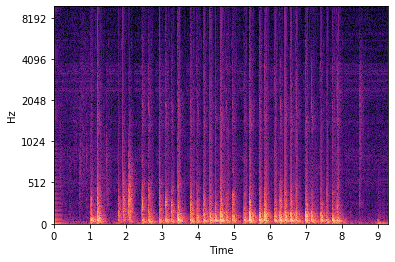

In [17]:
run_draw_melspecg_in_10_band(test_wav_file)

In [47]:
def run_drawing_3(wavfile):
    sr, sig = wavio.read(wavfile)
    framed_sig = framesig(sig,400,400)
    print("length of framed_sig is {}".format(len(framed_sig)))
    sample_len = 513
    mid_banks = [0.0,195.0985245,251.8401972,312.1788118,376.342384,
                 444.5733837,517.1296516,1550.447293,2554.078667,
                 3461.030019,4620.759758,8000.0]
    melfb = get_filterbank_from_midfreqs(midFreqs=mid_banks)
    sig_powspec = powspec(framed_sig,1024)
    sig_powspec = np.split(sig_powspec.T,[0,sample_len],axis=0)[1]
    print(melfb.shape)
    print(sig_powspec.shape)
    
    sig_specgram = np.dot(melfb,sig_powspec)
    log_specgram = 10*np.log(sig_specgram)
    librosa.display.specshow(librosa.power_to_db(sig_powspec, ref=np.max),y_axis='mel', fmax=9500, x_axis='time')
    plt.figure(figsize=(20,8))
    plt.subplot(211)
    plt.title('spectrogram of wav file')
    plt.title('wavform and spectrogram of wav file')
    plt.plot(sig)
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.imshow(log_specgram)

length of framed_sig is 400
[   0.         195.0985245  251.8401972  312.1788118  376.342384
  444.5733837  517.1296516 1550.447293  2554.078667  3461.030019
 4620.759758  8000.       ]
12
(10, 513)
(513, 400)


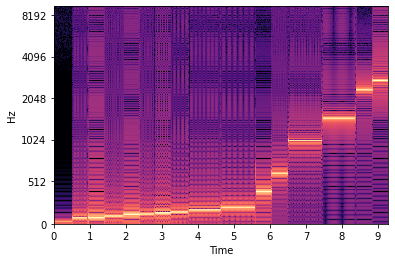

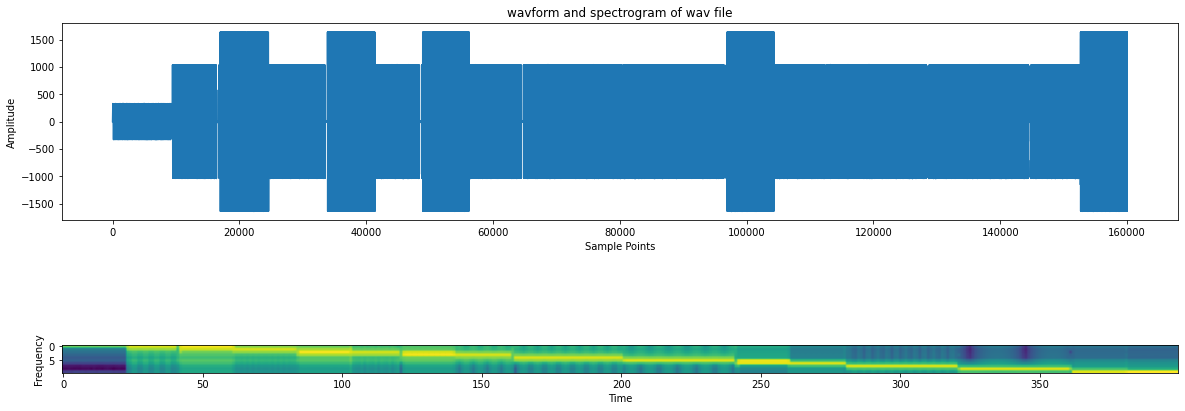

In [48]:
run_drawing_3(test_wav_file)

In [49]:
def run_drawing(wavfile):
    sr, sig = wavio.read(wavfile)
    plt.figure(figsize=(14,10))
    plt.subplot(211)
    plt.title('wavform and spectrogram of wav file')
    plt.plot(sig)
    plt.xlabel('Sample Points')
    plt.ylabel('Amplitude')
    plt.subplot(212)
    plt.specgram(sig,Fs=sr)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

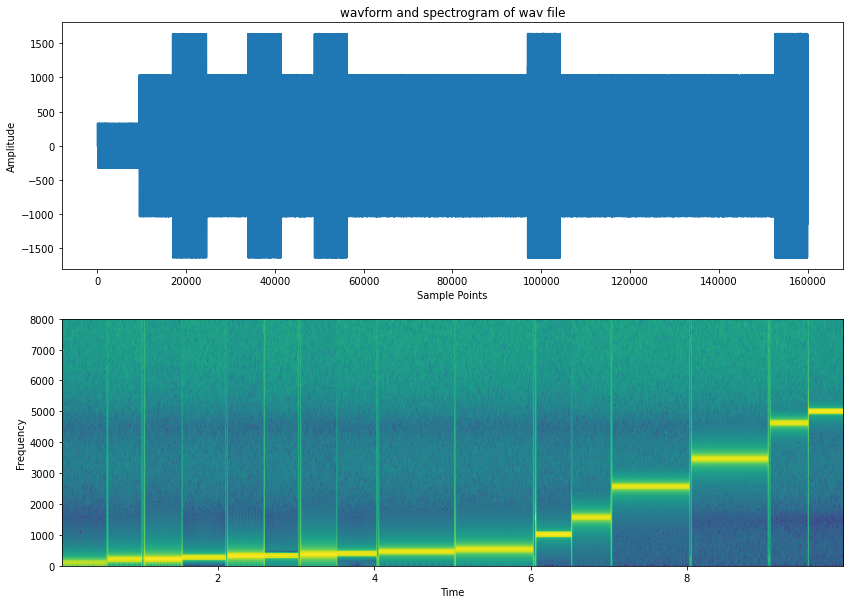

In [50]:
# test_wav = "./raw_wav/Flipped.dat.wav"
run_drawing(test_wav_file)

In [ ]:
# if __name__ == "__main__":
#     run_drawing()